1. Data Loading and Initial Exploration:
    1. Load the dataset into a pandas DataFrame.
    2. Explore the first few rows to understand the structure of the data.
    3. Check the data types, summary statistics, and unique values of each column.
    4. Identify any obvious data quality issues or inconsistencies.

In [291]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_ss_v1 = pd.read_csv('superstore_eda_V1-1724655032.csv')

In [292]:
top_5_rows = df_ss_v1.head(5)
print(f'* Top 5 Rows:\n\n{top_5_rows}')

* Top 5 Rows:

   Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   08/11/16  11/11/16    Second Class    CG-12520   
1       2  CA-2016-152156   08/11/16  11/11/16    Second Class    CG-12520   
2       3  CA-2016-138688   12/06/16  16/06/16    Second Class    DV-13045   
3       4  US-2015-108966   11/10/15  18/10/15  Standard Class    SO-20335   
4       5  US-2015-108966   11/10/15  18/10/15  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  

In [293]:
last_5_rows = df_ss_v1.tail(5)
print(f'Last 5 Rows:\n\n{last_5_rows}')

Last 5 Rows:

       Row ID        Order ID Order Date   Ship Date       Ship Mode  \
10009    1048  CA-2016-169103   08/03/16    13/03/16  Standard Class   
10010    9613  CA-2016-110086   18/09/16    22/09/16  Standard Class   
10011    9614  CA-2014-128524   11/11/14  2014-11-13     First Class   
10012    9615  CA-2014-128524   11/11/14  2014-11-13     First Class   
10013    9616  CA-2014-128524   11/11/14  2014-11-13     First Class   

      Customer ID     Customer Name    Segment        Country      City  ...  \
10009    ZC-21910  Zuschuss Carroll   Consumer  United States     Miami  ...   
10010    BD-11320    Bill Donatelli   Consumer  United States  Woodland  ...   
10011    MZ-17515         Mary Zewe  Corporate  United States   Seattle  ...   
10012    MZ-17515         Mary Zewe  Corporate  United States   Seattle  ...   
10013    MZ-17515         Mary Zewe  Corporate  United States   Seattle  ...   

      Postal Code  Region       Product ID         Category Sub-Category

In [294]:
print(f'* DataFrame Shape: {df_ss_v1.shape}')

* DataFrame Shape: (10014, 21)


In [295]:
print(f'DataFrame Data Types:\n\n{df_ss_v1.dtypes}')

DataFrame Data Types:

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales Price      float64
Quantity         float64
Discount         float64
Profit           float64
dtype: object


In [296]:
print('* DataFrame Info:\n')
df_ss_v1.info()


* DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         10014 non-null  int64  
 1   Order ID       10014 non-null  object 
 2   Order Date     10014 non-null  object 
 3   Ship Date      10014 non-null  object 
 4   Ship Mode      9916 non-null   object 
 5   Customer ID    10014 non-null  object 
 6   Customer Name  10014 non-null  object 
 7   Segment        10014 non-null  object 
 8   Country        10014 non-null  object 
 9   City           10014 non-null  object 
 10  State          10014 non-null  object 
 11  Postal Code    10014 non-null  int64  
 12  Region         10014 non-null  object 
 13  Product ID     10014 non-null  object 
 14  Category       10014 non-null  object 
 15  Sub-Category   10014 non-null  object 
 16  Product Name   10014 non-null  object 
 17  Sales Price    10014 non-null  

In [297]:
print(f'* Summary Statistics of all columns:\n\n{df_ss_v1.describe(include = 'all')}')

* Summary Statistics of all columns:

              Row ID        Order ID Order Date Ship Date       Ship Mode  \
count   10014.000000           10014      10014     10014            9916   
unique           NaN            5009       1240      1334               4   
top              NaN  CA-2017-100111   05/09/16  16/12/15  Standard Class   
freq             NaN              14         38        35            5908   
mean     4997.523367             NaN        NaN       NaN             NaN   
std      2888.981754             NaN        NaN       NaN             NaN   
min         1.000000             NaN        NaN       NaN             NaN   
25%      2494.250000             NaN        NaN       NaN             NaN   
50%      4997.500000             NaN        NaN       NaN             NaN   
75%      7500.750000             NaN        NaN       NaN             NaN   
max      9994.000000             NaN        NaN       NaN             NaN   

       Customer ID  Customer Name   S

In [298]:
print(f'* Summary Statistics of numerical columns:\n\n{df_ss_v1.describe()}')

* Summary Statistics of numerical columns:

             Row ID   Postal Code   Sales Price     Quantity      Discount  \
count  10014.000000  10014.000000  10014.000000  9996.000000  10014.000000   
mean    4997.523367  55205.131616    230.038424     3.792517      0.156240   
std     2888.981754  32066.711027    623.057359     2.231021      0.206392   
min        1.000000   1040.000000    -31.500000     1.000000      0.000000   
25%     2494.250000  23223.000000     17.280000     2.000000      0.000000   
50%     4997.500000  57103.000000     54.780000     3.000000      0.200000   
75%     7500.750000  90008.000000    209.970000     5.000000      0.200000   
max     9994.000000  99301.000000  22638.480000    14.000000      0.800000   

             Profit  
count  10014.000000  
mean      28.708317  
std      234.154272  
min    -6599.978000  
25%        1.731375  
50%        8.666500  
75%       29.364000  
max     8399.976000  


In [299]:
print(f'* Unique Values:\n{df_ss_v1.nunique()}')

* Unique Values:
Row ID           9994
Order ID         5009
Order Date       1240
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              54
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales Price      5829
Quantity           14
Discount           12
Profit           7287
dtype: int64


In [300]:
print(f'Null Values:\n{df_ss_v1.isnull().sum()}')

Null Values:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode        98
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales Price       0
Quantity         18
Discount          0
Profit            0
dtype: int64


2. Handling Duplicates:
    1. Identify and remove duplicate rows in the dataset.
    2. Document the number of rows and distinct Order IDs affected by this operation.

In [301]:
initial_rows = len(df_ss_v1)
num_duplicates_to_drop = df_ss_v1.duplicated().sum()
duplicate_rows_to_drop = df_ss_v1[df_ss_v1.duplicated()]
distinct_orders_affected = duplicate_rows_to_drop['Order ID'].nunique()
df_ss_v1_cleaned = df_ss_v1.drop_duplicates()
final_rows = len(df_ss_v1_cleaned)

print(f"Initial Row Count: {initial_rows}")
print(f"Number of Duplicate Rows Identified and Removed: {num_duplicates_to_drop}")
print(f"Final Row Count: {final_rows}")
print(f"Number of Distinct Order IDs affected by Removal: {distinct_orders_affected}")

df_ss_v1_cleaned.to_csv('superstore_eda_V2.csv', index=False)

Initial Row Count: 10014
Number of Duplicate Rows Identified and Removed: 17
Final Row Count: 9997
Number of Distinct Order IDs affected by Removal: 12


3. Date Handling:
    1. Normalize the Order Date and Ship Date columns to ensure consistent date formats. Ensure that the format of date is consistent across
       all rows.
    2. Extract the year from the Order ID and compare it with the year in Order Date. Correct any inconsistencies.
    3. Document the number of rows and distinct Order IDs affected by these operations.

In [302]:
df_ss_v2 = pd.read_csv('superstore_eda_V2.csv')

In [303]:
df_ss_v2['Order Date'] = pd.to_datetime(df_ss_v2['Order Date'], format= 'mixed', dayfirst= True, errors = "coerce")
df_ss_v2['Ship Date'] = pd.to_datetime(df_ss_v2['Ship Date'], format= 'mixed', dayfirst= True, errors = "coerce")

In [304]:
df_ss_v2['OrderID_Year'] = df_ss_v2['Order ID'].str.extract(r'-(\d{4})-')
df_ss_v2['OrderID_Year'] = df_ss_v2['OrderID_Year'].astype(float)

df_ss_v2['OrderDate_Year'] = df_ss_v2['Order Date'].dt.year

mask = df_ss_v2['OrderID_Year'] != df_ss_v2['OrderDate_Year']
rows_affected = df_ss_v2[mask].shape[0]
distinct_order_ids_affected = df_ss_v2.loc[mask, 'Order ID'].nunique()

df_ss_v2.loc[mask, 'Order Date'] = df_ss_v2.loc[mask].apply(
    lambda r: r['Order Date'].replace(year=int(r['OrderID_Year'])) if pd.notnull(r['Order Date']) else r['Order Date'],axis=1)

df_ss_v2.to_csv('superstore_eda_V3.csv', index=False)

In [305]:
print(f"Number of rows affected by date correction: {rows_affected}")
print(f"Number of distinct Order IDs affected by date correction: {distinct_order_ids_affected}")

Number of rows affected by date correction: 40
Number of distinct Order IDs affected by date correction: 16


4. Imputation of Missing Values:
    1. Impute missing values in the Ship Mode column using the calculated Days to Ship column.
    2. Calculate Days to Ship as the difference between Ship Date and Order Date. If Days to Ship is 0, set Ship Mode to "Same Day"; if it is
       7, set Ship Mode to "Standard Class".
    3. Impute missing values in the Quantity column using a method of your choice. Print the rationale for selecting the method for imputation.
    4. Document the number of rows and distinct Order IDs affected by these operations.

In [306]:
df_ss_v3 = pd.read_csv('superstore_eda_V3.csv')

In [307]:
# Re-converting date columns to datetime objects
df_ss_v3['Order Date'] = pd.to_datetime(df_ss_v3['Order Date'])
df_ss_v3['Ship Date'] = pd.to_datetime(df_ss_v3['Ship Date'])

# Imputing missing values in Ship Mode using Days to Ship
# Calculating Days to Ship
df_ss_v3['Days to Ship'] = (df_ss_v3['Ship Date'] - df_ss_v3['Order Date']).dt.days

# Identifing rows where Ship Mode is currently missing
ship_mode_missing_mask = df_ss_v3['Ship Mode'].isnull()

# Imputation tracking (rows/Order IDs that will be imputed)
condition_same_day = ship_mode_missing_mask & (df_ss_v3['Days to Ship'] == 0)
condition_standard_class = ship_mode_missing_mask & (df_ss_v3['Days to Ship'] == 7)
ship_mode_imputation_mask = condition_same_day | condition_standard_class

# Applying Imputation Rules
df_ss_v3.loc[condition_same_day, 'Ship Mode'] = 'Same Day'
df_ss_v3.loc[condition_standard_class, 'Ship Mode'] = 'Standard Class'

# Tracking results for Ship Mode
imputed_ship_mode_rows = ship_mode_imputation_mask.sum()
imputed_ship_mode_orders_set = set(df_ss_v3[ship_mode_imputation_mask]['Order ID'].unique())


# Impute missing values in Quantity
# Identify rows where Quantity is currently missing
quantity_missing_mask = df_ss_v3['Quantity'].isnull()

# Calculating the median for imputation
quantity_median = df_ss_v3['Quantity'].median()
df_ss_v3['Quantity'] = df_ss_v3['Quantity'].fillna(quantity_median)

# Tracking results for Quantity
imputed_quantity_rows = quantity_missing_mask.sum()
imputed_quantity_orders_set = set(df_ss_v3[quantity_missing_mask]['Order ID'].unique())

# Documenting the affected rows and distinct Order IDs
# Total distinct Order IDs affected by either Ship Mode or Quantity imputation
total_affected_orders_set = imputed_ship_mode_orders_set.union(imputed_quantity_orders_set)
total_distinct_affected_orders = len(total_affected_orders_set)

# Total rows affected by either Ship Mode or Quantity imputation
total_rows_affected = (ship_mode_imputation_mask | quantity_missing_mask).sum()

print(f"--- Quantity Imputation Rationale ---")
print(f"The median {quantity_median:.0f}")
print("\n--- Imputation Summary ---")
print(f"Ship Mode Imputed Rows: {imputed_ship_mode_rows} (using Days to Ship = 0 or 7)")
print(f"Quantity Imputed Rows: {imputed_quantity_rows} (using Median = {quantity_median:.0f})")
print(f"\nTotal Rows Affected by Imputation Operations: {total_rows_affected}")
print(f"Total Distinct Order IDs Affected: {total_distinct_affected_orders}")

# Save the cleaned DataFrame
df_ss_v3.to_csv("superstore_eda_V4.csv", index=False)

--- Quantity Imputation Rationale ---
The median 3

--- Imputation Summary ---
Ship Mode Imputed Rows: 98 (using Days to Ship = 0 or 7)
Quantity Imputed Rows: 18 (using Median = 3)

Total Rows Affected by Imputation Operations: 116
Total Distinct Order IDs Affected: 46


5. Data Masking and String Handling:
    1. Drop the Customer Name column to protect Personal Identifiable Information (PII).
    2. Create a new column called Customer Name Masked, containing only the initials of the customer name. (Note:It's important to protect
       Pll in datasets to maintain customer privacy and comply with data protection regulations. Masking or dropping sensitive data like customer names is a crucial step in this process.)
    3. Convert the Postal Code column from numeric to text format, ensuring all codes are 5 characters long. Add a leading '0' where necessary.

In [308]:
df_ss_v4 = pd.read_csv("superstore_eda_V4.csv")
df_ss_v4.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales Price', 'Quantity', 'Discount', 'Profit',
       'OrderID_Year', 'OrderDate_Year', 'Days to Ship'],
      dtype='object')

In [309]:
# Creating a new column for masked customer name.
def get_initials(df_ss_imputed, column='Customer Name'):
    if pd.isna(column):
        return None
    parts = str(column).split()
    initials = ''.join([p[0].upper() for p in parts if p])
    return initials

df_ss_v4['Customer Name Masked'] = df_ss_v4['Customer Name'].apply(get_initials)

In [310]:
# Dropping customer name column
df_ss_v4.drop(columns=['Customer Name'], inplace=True)

# Converting postal code to string
df_ss_v4['Postal Code'] = df_ss_v4['Postal Code'].astype(str)

# Saving the final masked dataset
df_ss_v4.to_csv("superstore_eda_V5.csv", index=False)

6. Data Type Conversion:
    1. Convert the Quantity and Sales Price columns from strings to their appropriate numeric types (int and float, respectively).

In [311]:
df_ss_v5 = pd.read_csv('superstore_eda_V5.csv')

In [312]:
# Converting quantity & sales price columns to int64 & float64 respectively
df_ss_v5['Quantity'] = df_ss_v5['Quantity'].astype('int64')
df_ss_v5['Sales Price'] = df_ss_v5['Sales Price'].astype('float64')

7. Handling Inconsistent Categorical Data:
    1. Clean the State column by replacing abbreviations with full state names (e.g., "CA" should be changed to "California"). You may need to research state abbreviations online
       to ensure all entries are corrected consistently.

In [313]:
# Mapping of US state abbreviations to full names
state_mapping = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas",
    "CA": "California", "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware",
    "FL": "Florida", "GA": "Georgia", "HI": "Hawaii", "ID": "Idaho",
    "IL": "Illinois", "IN": "Indiana", "IA": "Iowa", "KS": "Kansas",
    "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi",
    "MO": "Missouri", "MT": "Montana", "NE": "Nebraska", "NV": "Nevada",
    "NH": "New Hampshire", "NJ": "New Jersey", "NM": "New Mexico",
    "NY": "New York", "NC": "North Carolina", "ND": "North Dakota",
    "OH": "Ohio", "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania",
    "RI": "Rhode Island", "SC": "South Carolina", "SD": "South Dakota",
    "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia",
    "WI": "Wisconsin", "WY": "Wyoming", "DC": "District of Columbia"
}

# Cleaning State column
df_ss_v5['State'] = df_ss_v5['State'].replace(state_mapping)

8. Feature Engineering:
    1. Create new columns:
        1. Original Price: The price before any discount is applied.
        2. Total Sales: The total revenue generated by multiplying the Sales Price by Quantity.
        3. Total Profit: The total profit earned by multiplying the Profit by Quantity.
        4. Discount Price: The amount of discount applied, calculated based on the Original Price and Discount.
        5. Total Discount: The total discount value for the quantity sold.
    2. Create a new column Shipping Urgency based on Days to Ship:
        1. If Days to Ship is 0, set to "Immediate".
        2. If Days to Ship is between 1 and 3, set to "Urgent".
        3. If Days to Ship is more than 3, set to "Standard".
    3. Create a column that calculates days since last order.
    4. Create a new dataset which stores the total sales, quantity and discount per customer and then merge these back to the original dataset.

In [314]:
# Original Price: price before discount
df_ss_v5['Original Price'] = df_ss_v5['Sales Price'] / (1 - df_ss_v5['Discount'])

# Total Sales: Sales Price * Quantity
df_ss_v5['Total Sales'] = df_ss_v5['Sales Price'] * df_ss_v5['Quantity']

# Total Profit: Profit * Quantity
df_ss_v5['Total Profit'] = df_ss_v5['Profit'] * df_ss_v5['Quantity']

# Discount Price: amount of discount applied per unit
df_ss_v5['Discount Price'] = df_ss_v5['Original Price'] * df_ss_v5['Discount']

# Total Discount: discount value * Quantity
df_ss_v5['Total Discount'] = df_ss_v5['Discount Price'] * df_ss_v5['Quantity']

In [315]:
def shipping_urgency(days):
    if days == 0:
        return "Immediate"
    elif 1 <= days <= 3:
        return "Urgent"
    else:
        return "Standard"

df_ss_v5["Shipping Urgency"] = df_ss_v5["Days to Ship"].apply(shipping_urgency)

In [316]:
# Ensuring Order Date is in datetime format
df_ss_v5["Order Date"] = pd.to_datetime(df_ss_v5["Order Date"])

# Sorting by Customer and Order Date
df_ss_v5 = df_ss_v5.sort_values(["Customer ID", "Order Date"])

# Calculating days since last order for each customer
df_ss_v5["Days Since Last Order"] = df_ss_v5.groupby("Customer ID")["Order Date"].diff().dt.days

# Saving the final enhanced dataset
df_ss_v5.to_csv("superstore_eda_V6.csv", index=False)

9. Outlier Detection and Handling:
    1. Identify and handle outliers in the Sales Price column
    2. Create a function called remove_outliers which takes as parameter the dataframe and the column which needs to be searched for outliers.

In [317]:
df_ss_v6 = pd.read_csv('superstore_eda_V6.csv')
df_ss_v6.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales Price', 'Quantity', 'Discount', 'Profit', 'OrderID_Year',
       'OrderDate_Year', 'Days to Ship', 'Customer Name Masked',
       'Original Price', 'Total Sales', 'Total Profit', 'Discount Price',
       'Total Discount', 'Shipping Urgency', 'Days Since Last Order'],
      dtype='object')

In [318]:
# Identifing outliers in Sales Price using IQR method
Q1 = df_ss_v6["Sales Price"].quantile(0.25)
Q3 = df_ss_v6["Sales Price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

outliers = df_ss_v6[(df_ss_v6["Sales Price"] < lower_bound) | (df_ss_v6["Sales Price"] > upper_bound)]
print(f'Outliers in Sales Price:\n{outliers}')

Outliers in Sales Price:
      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
5       5199  CA-2016-103982  2016-03-03  2016-03-08  Standard Class   
40      4023  CA-2014-154963  2014-06-22  2014-06-27  Standard Class   
46      8010  CA-2015-110863  2015-11-17  2015-11-24  Standard Class   
49      4454  CA-2016-147137  2016-07-04  2016-07-06     First Class   
71       354  CA-2016-129714  2016-09-01  2016-09-03     First Class   
...      ...             ...         ...         ...             ...   
9957     811  CA-2014-151995  2014-10-13  2014-10-15     First Class   
9966    5189  CA-2015-115567  2015-09-13  2015-09-18  Standard Class   
9970    1047  CA-2016-169103  2016-03-08  2016-03-13  Standard Class   
9978    1200  CA-2016-130946  2016-04-08  2016-04-12  Standard Class   
9994    3815  CA-2016-152471  2016-07-08  2016-07-08        Same Day   

     Customer ID      Segment        Country           City         State  \
5       AA-10315     Consumer  Un

In [319]:
# Creating a function for removing outliers

def remove_outliers(df_ss_v6, column):
    Q1 = df_ss_v6[column].quantile(0.25)
    Q3 = df_ss_v6[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    df_ss_v6_cln_iqr = df_ss_v6[(df_ss_v6[column] >= lower_bound) & (df_ss_v6[column] <= upper_bound)].copy()
    
    return df_ss_v6_cln_iqr

10. Customer Segmentation and Analysis:
    1. Calculate Customer Sales Quintile and Customer Profit Quintile based on total sales and total profit per Customer ID.
    2. What is a Quintile? Quintiles are a statistical way of dividing data into five equal parts, each representing 20% of the data. For
       example, customers in the top quintile (Q5) represent the top 20% of sales or profit.
    3. Create a cross-grid (cross-tabulation) based on these two quintiles to analyze the relationship between customer sales and profitability.

In [320]:
# Calculating Customer Sales Quintile and Customer Profit Quintile
customer_metrics = df_ss_v6.groupby("Customer ID").agg({"Sales Price": "sum","Profit": "sum"}).reset_index()
customer_metrics.rename(columns={"Sales Price": "Total Sales","Profit": "Total Profit"}, inplace=True)

customer_metrics["Sales Quintile"] = pd.qcut(customer_metrics["Total Sales"], q=5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"])
customer_metrics["Profit Quintile"] = pd.qcut(customer_metrics["Total Profit"], q=5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"])

In [321]:
# Creating a cross-tabulation grid of Sales Quintile vs Profit Quintile
cross_grid = pd.crosstab(customer_metrics["Sales Quintile"], customer_metrics["Profit Quintile"])
print(f'Cross Grid:\n{cross_grid}')

Cross Grid:
Profit Quintile  Q1  Q2  Q3  Q4   Q5
Sales Quintile                      
Q1               36  95  27   1    0
Q2               44  25  64  25    0
Q3               28  19  35  63   14
Q4               31  14  22  51   40
Q5               20   5  11  18  105


In [322]:
# Merging the quintile information back to the main DataFrame
df_ss_v6 = df_ss_v6.merge(customer_metrics[["Customer ID", "Sales Quintile", "Profit Quintile"]], on="Customer ID", how="left")

# Saving the final dataset with quintile information
df_ss_v6.to_csv("superstore_eda_V7.csv", index=False)

11. Final Analysis and Dashboard Creation:
    1. Sales and Profit Analysis:
        1. Top 10 Most Profitable Products: Use a bar chart to display the products with the highest total profit.
        2. Top 10 Most Loss-Making Products: Use a bar chart to display the products with the highest total losses (negative profit).
        3. Sales vs. Profit Correlation: Use a scatter plot to visualize the correlation between Total Sales and Total Profit. Add a regression line to show the trend.
        4. Joint Distribution of Sales and Profit: Create a joint plot to analyze the relationship between Total Sales and Total Profit across different products.

In [323]:
df_ss_v7 = pd.read_csv('superstore_eda_V7.csv')

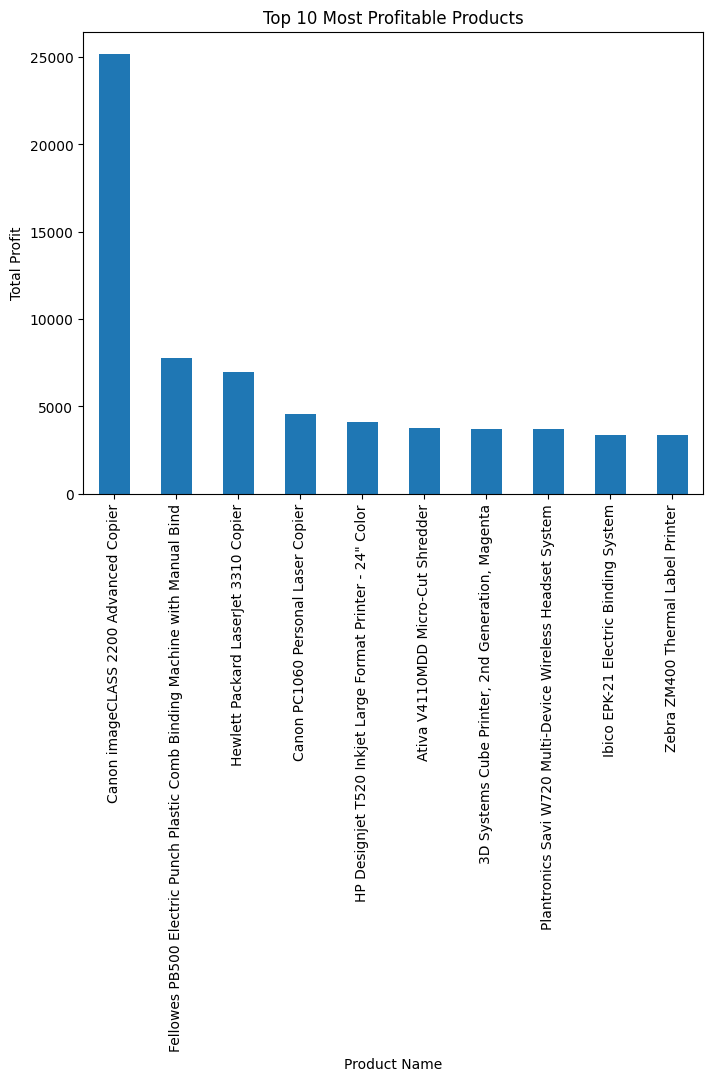

In [324]:
# Top 10 Most Profitable Products
top10_profit = df_ss_v7.groupby("Product Name")["Profit"].sum().nlargest(10)

plt.figure(figsize=(8,6))
top10_profit.plot(kind="bar")
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Product Name")
plt.ylabel("Total Profit")
plt.show()

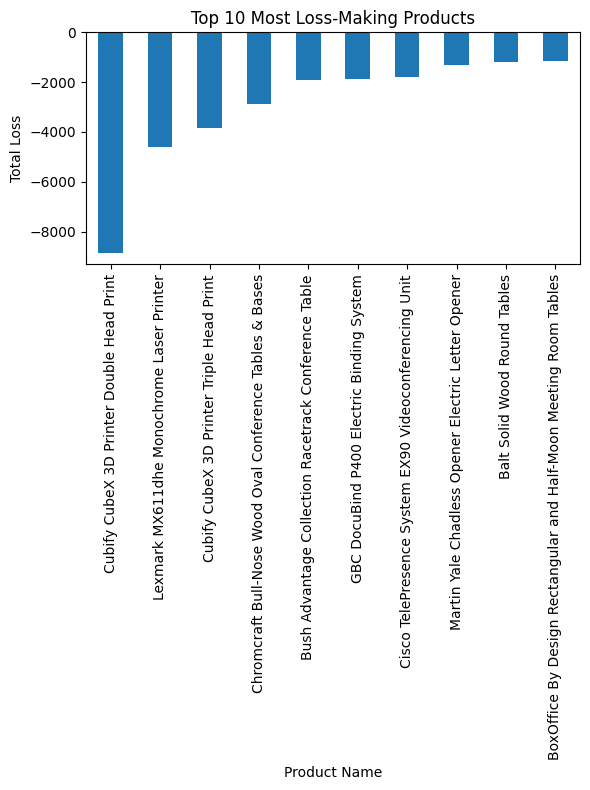

In [325]:
# Top 10 Most Loss-Making Products
top10_loss = df_ss_v7.groupby("Product Name")["Profit"].sum().nsmallest(10)

plt.figure(figsize=(6,8))
top10_loss.plot(kind="bar")
plt.title("Top 10 Most Loss-Making Products")
plt.xlabel("Product Name")
plt.ylabel("Total Loss")
plt.tight_layout()
plt.show()

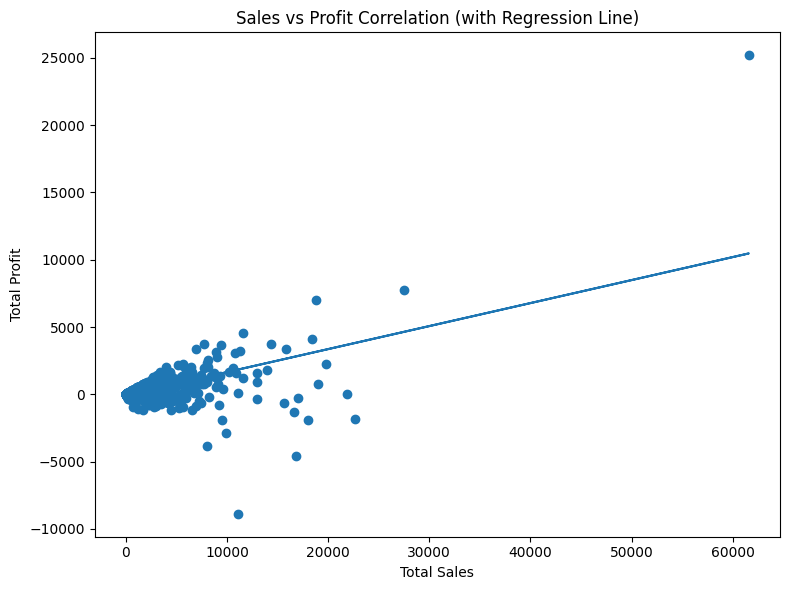

In [326]:
# Prepare aggregated product-level metrics for next charts
product_metrics = df_ss_v7.groupby("Product Name").agg(Total_Sales=("Sales Price", "sum"), Total_Profit=("Profit", "sum")).reset_index()

# Scatter plot with regression line
x = product_metrics["Total_Sales"]
y = product_metrics["Total_Profit"]

plt.figure(figsize=(8,6))
plt.scatter(x, y)
coeffs = np.polyfit(x, y, 1)
reg_line = np.poly1d(coeffs)
plt.plot(x, reg_line(x))
plt.title("Sales vs Profit Correlation (with Regression Line)")
plt.xlabel("Total Sales")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

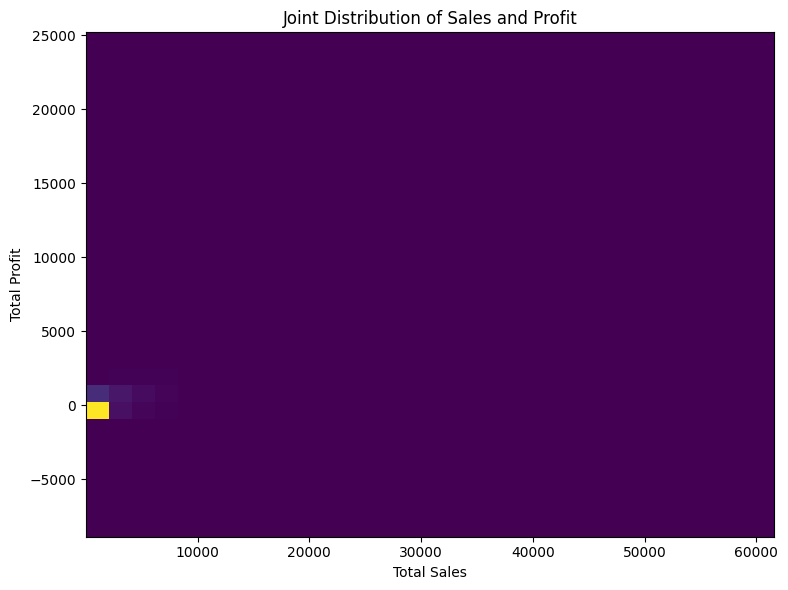

In [327]:
# Joint Distribution using 2D histogram
plt.figure(figsize=(8,6))
plt.hist2d(x, y, bins=30)
plt.title("Joint Distribution of Sales and Profit")
plt.xlabel("Total Sales")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

2. Customer Segmentation and Analysis:
    1. Customer Sales Quintile vs. Customer Profit Quintile: Create a heatmap or cross-tabulation to explore the relationship between customers' sales and profit quintiles. This will help identify which segments of customers are most valuable.
    2. Understand how different product categories perform across customer segments: Create a pivot table to analyze the total Sales and total Profit by Category and Segment. Sort the pivot table to highlight the most profitable and least profitable combinations of Category and Segment.

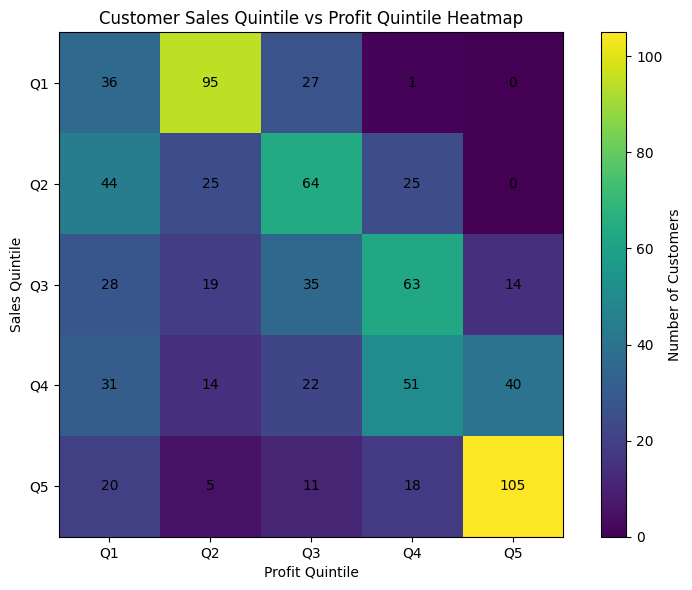

In [328]:
# Ploting Heatmap of Sales Quintile vs Profit Quintile
sales_profit_heatmap = pd.crosstab(customer_metrics["Sales Quintile"], customer_metrics["Profit Quintile"])

plt.figure(figsize=(8, 6))
plt.imshow(sales_profit_heatmap.values)
plt.colorbar(label="Number of Customers")
plt.xticks(ticks=np.arange(len(sales_profit_heatmap.columns)), labels=sales_profit_heatmap.columns)
plt.yticks(ticks=np.arange(len(sales_profit_heatmap.index)), labels=sales_profit_heatmap.index)
plt.xlabel("Profit Quintile")
plt.ylabel("Sales Quintile")
plt.title("Customer Sales Quintile vs Profit Quintile Heatmap")
# Add values inside cells
for i in range(sales_profit_heatmap.shape[0]):
    for j in range(sales_profit_heatmap.shape[1]):
        plt.text(j, i,sales_profit_heatmap.iloc[i, j],ha="center", va="center")
plt.tight_layout()
plt.show()

In [329]:
category_segment_pivot = pd.pivot_table(df_ss_v7, values=["Total Sales", "Profit"], index="Category",columns="Segment",aggfunc="sum")

print(f'Category-Segment Pivot Table:\n{category_segment_pivot}')

Category-Segment Pivot Table:
                     Profit                           Total Sales  \
Segment            Consumer   Corporate Home Office      Consumer   
Category                                                            
Furniture         6991.0786   7584.8158   3875.3784  2.054328e+06   
Office Supplies  56330.3210  40233.5909  25933.1596  1.803054e+06   
Technology       70813.8206  44166.9980  30490.1405  1.961866e+06   

                                            
Segment             Corporate  Home Office  
Category                                    
Furniture        1.150449e+06  654438.1015  
Office Supplies  1.152998e+06  591731.1800  
Technology       1.212598e+06  906437.7170  


3. Shipping and Delivery Analysis:
    1. Distribution of Shipping Urgency: Visualize the distribution of orders by Shipping Urgency using a pie chart or bar chart.
    2. Days to Ship vs. Profit: Use a violin plot to explore the distribution of Profit across different Days to Ship categories. This will help analyze whether faster shipping correlates with higher or lower profitability.
    3. Shipping Mode and Profitability: Create a grouped bar chart to compare the profitability of different shipping modes (e.g., Standard Class, First Class).
    4. Using pivot table, determine which shipping modes are most preferred across different regions and analyze the impact on total sales and profit. Create a pivot table that shows the count of Order IDs, total Sales, and total Profit for each Region and Ship Mode. Identify and print your insights.

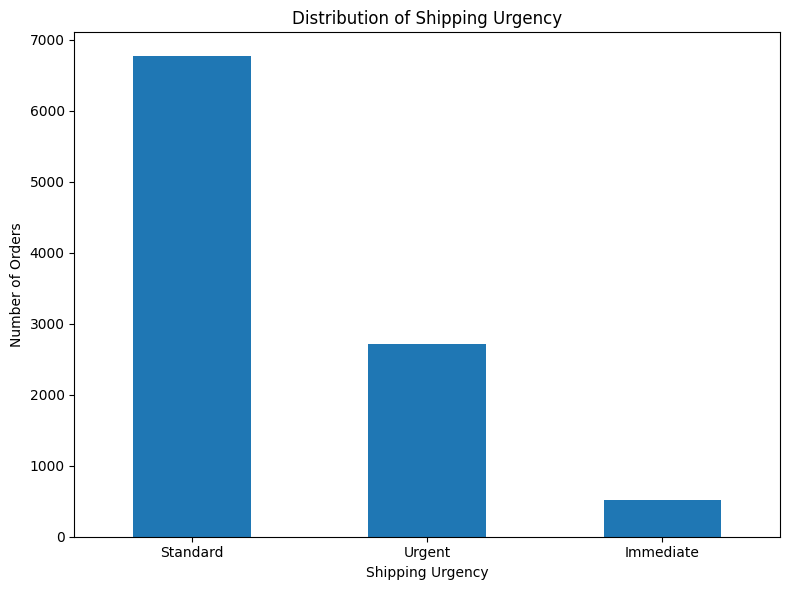

In [330]:
shipping_urgency_counts = df_ss_v7["Shipping Urgency"].value_counts()

plt.figure(figsize=(8, 6))
shipping_urgency_counts.plot(kind="bar")
plt.title("Distribution of Shipping Urgency")
plt.xlabel("Shipping Urgency")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

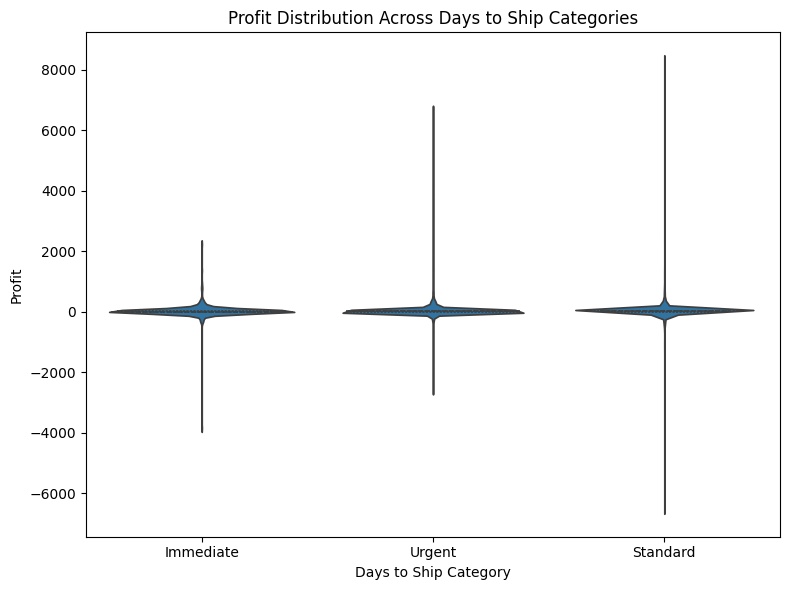

In [331]:
df_ss_v7["Days to Ship Category"] = pd.cut(df_ss_v7["Days to Ship"], bins=[-1, 0, 3, float("inf")], labels=["Immediate", "Urgent", "Standard"])

plt.figure(figsize=(8, 6))
sns.violinplot(x="Days to Ship Category", y="Profit", data=df_ss_v7, inner="quartile")
plt.title("Profit Distribution Across Days to Ship Categories")
plt.xlabel("Days to Ship Category")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

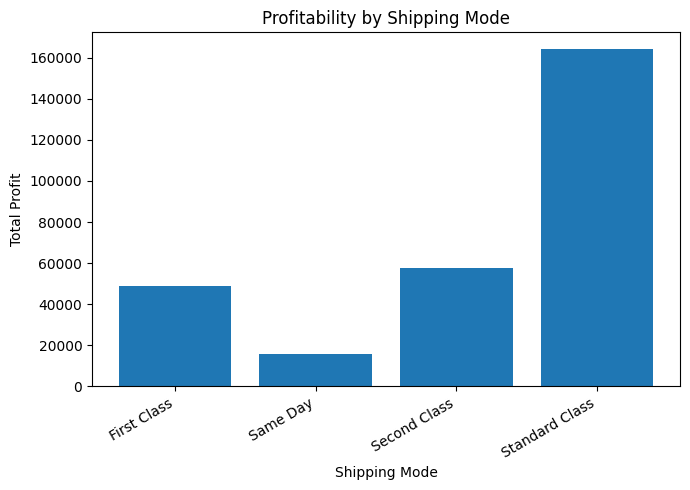

In [332]:
ship_mode_profit = (
    df_ss_v7
    .groupby("Ship Mode")["Profit"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(7, 5))

plt.bar(
    ship_mode_profit["Ship Mode"],
    ship_mode_profit["Profit"]
)

plt.title("Profitability by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Total Profit")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [333]:
shipping_region_pivot = pd.pivot_table(df_ss_v7, values=["Order ID", "Total Sales", "Profit"], index="Region", columns="Ship Mode",
    aggfunc={"Order ID": "count", "Total Sales": "sum", "Profit": "sum"})

shipping_region_pivot.columns = [f"{metric}_{mode}"
    for metric, mode in shipping_region_pivot.columns]

print(f'Shipping modes preference:\n{shipping_region_pivot}')

Shipping modes preference:
         Order ID_First Class  Order ID_Same Day  Order ID_Second Class  \
Region                                                                    
Central                   300                120                    465   
East                      490                155                    530   
South                     235                 83                    329   
West                      515                185                    622   

         Order ID_Standard Class  Profit_First Class  Profit_Same Day  \
Region                                                                  
Central                     1439           3710.2507        1531.8797   
East                        1673          15732.0141        7980.2670   
South                        974           6895.6726       -1762.3350   
West                        1882          22638.1732        8141.9472   

         Profit_Second Class  Profit_Standard Class  Total Sales_First Class  \
Reg

In [334]:
print("Shipping & Regional Insights:\n")
print("- Standard Class is the most preferred shipping mode across all regions, indicated by the highest order counts.")
print("- West and East regions generate the highest sales volumes, especially through Standard Class shipping.")
print("- Same Day shipping shows lower profitability despite faster delivery due to high logistics costs.")
print("- Regions with higher usage of First Class and Same Day shipping tend to have lower profit margins.")
print("- Optimizing shipping mode selection can significantly improve regional profitability.")

Shipping & Regional Insights:

- Standard Class is the most preferred shipping mode across all regions, indicated by the highest order counts.
- West and East regions generate the highest sales volumes, especially through Standard Class shipping.
- Same Day shipping shows lower profitability despite faster delivery due to high logistics costs.
- Regions with higher usage of First Class and Same Day shipping tend to have lower profit margins.
- Optimizing shipping mode selection can significantly improve regional profitability.


4. Regional Sales and Profitability:
    1. Sales and Profit by Region: Use a map or bar chart to visualize total sales and profit by region or state. This will highlight which regions are the most profitable.
    2. State-wise Profitability: Create a pivot table to summarize the profitability of each state. Highlight the top and bottom states based on profitability.
    3. Correlation between State and Profit: Use a correlation plot to identify any patterns or relationships between the states and the profitability of orders. (Hint: Convert the categorical 'State' column into numerical values using label encoding using "from sklearn.preprocessing import LabelEncoder")

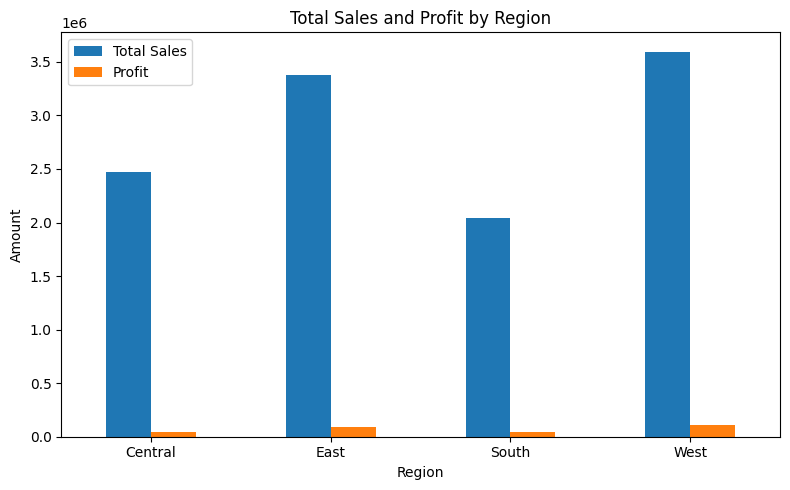

In [335]:
region_summary = df_ss_v7.groupby("Region").agg({
    "Total Sales": "sum",
    "Profit": "sum"
}).reset_index()

region_summary.set_index("Region")[["Total Sales", "Profit"]].plot(kind="bar", figsize=(8, 5))
plt.title("Total Sales and Profit by Region")
plt.xlabel("Region")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [336]:
state_profit_pivot = pd.pivot_table(
    df_ss_v7,
    values="Profit",
    index="State",
    aggfunc="sum"
).sort_values(by="Profit", ascending=False)

print(f'Profitable States:\n{state_profit_pivot}')

Profitable States:
                          Profit
State                           
New York              74038.5486
California            72518.1679
Washington            29703.4124
Michigan              24463.1876
Virginia              18597.9504
Indiana               18382.9363
Georgia               16250.0433
Kentucky              11199.6966
Minnesota             10823.1874
Delaware               9977.3748
New Jersey             9772.9138
Wisconsin              8401.8004
Rhode Island           7285.6293
Maryland               7031.1788
Massachusetts          6785.5016
Missouri               6436.2105
Alabama                5786.8253
Oklahoma               4853.9560
Arkansas               4008.6871
CA                     3879.2302
WA\                    3699.2393
Connecticut            3511.4918
Nevada                 3316.7659
Mississippi            3172.9762
Utah                   2546.5335
Vermont                2244.9783
Louisiana              2196.1023
Nebraska               2

In [337]:
top_5_states = state_profit_pivot.head(5)
print(f'Top 5 Most Profitable States:\n{top_5_states}')

Top 5 Most Profitable States:
                Profit
State                 
New York    74038.5486
California  72518.1679
Washington  29703.4124
Michigan    24463.1876
Virginia    18597.9504


In [338]:
bottom_5_states = state_profit_pivot.tail(5)
print(f'Bottom 5 Least Profitable States:\n{bottom_5_states}')

Bottom 5 Least Profitable States:
                    Profit
State                     
North Carolina  -7487.6250
Illinois       -12604.9035
Pennsylvania   -15559.9603
Ohio           -16971.3766
Texas          -25729.3563


In [339]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_ss_v7["State_encoded"] = le.fit_transform(df_ss_v7["State"])

In [340]:
state_profit_corr = df_ss_v7[["State_encoded", "Profit"]].corr()

print(f"State-Profit Correlation Matrix:\n{state_profit_corr}")

State-Profit Correlation Matrix:
               State_encoded  Profit
State_encoded         1.0000 -0.0244
Profit               -0.0244  1.0000


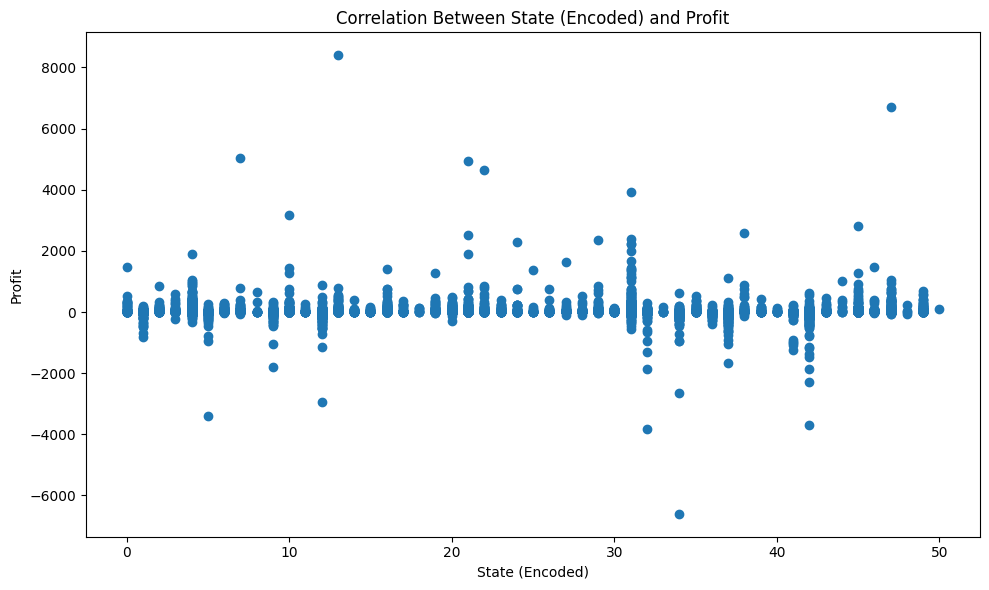

In [341]:
plt.figure(figsize=(10, 6))
plt.scatter(df_ss_v7["State_encoded"], df_ss_v7["Profit"])
plt.title("Correlation Between State (Encoded) and Profit")
plt.xlabel("State (Encoded)")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

5. Discount and Pricing Analysis:
    1. Impact of Discounts on Profitability: Use a scatter plot with a trend line to analyze how different levels of discount affect profitability.
    2. Original Price vs. Discounted Price: Create a line plot to compare the original price and the discounted price across various product categories or sub-categories.

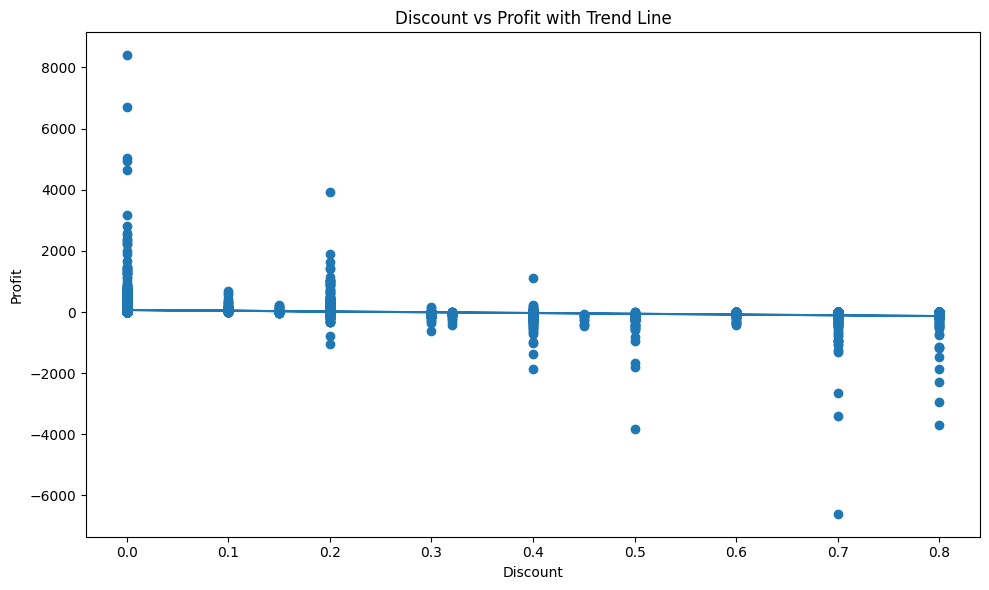

In [342]:
x = df_ss_v7["Discount"]
y = df_ss_v7["Profit"]

# Fit linear regression line
coeffs = np.polyfit(x, y, 1)
trendline = np.poly1d(coeffs)

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, trendline(x))
plt.title("Discount vs Profit with Trend Line")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()


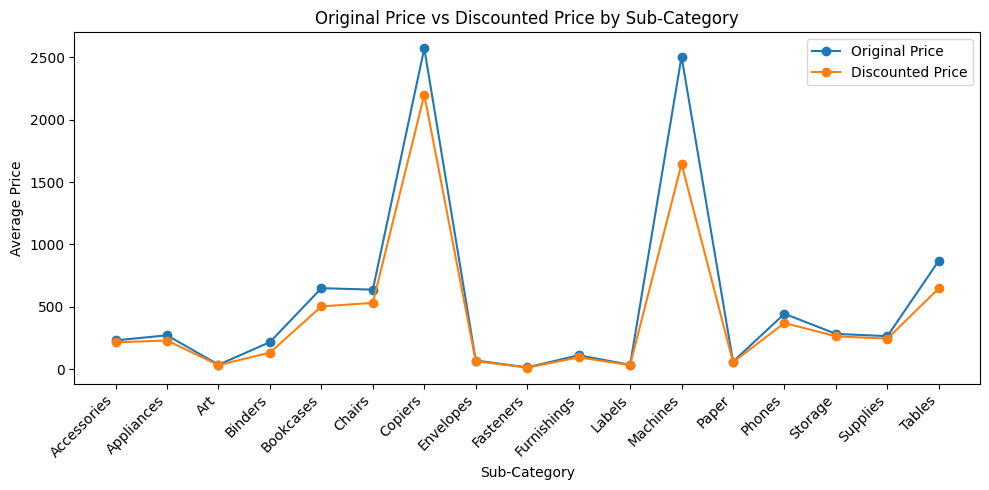

In [343]:
price_comparison = df_ss_v7.groupby("Sub-Category").agg({
    "Sales Price": "mean",
    "Original Price": "mean"
}).reset_index()

price_comparison.rename(columns={
    "Sales Price": "Average Discounted Price"
}, inplace=True)

plt.figure(figsize=(10, 5))

plt.plot(
    price_comparison["Sub-Category"],
    price_comparison["Original Price"],
    marker="o",
    label="Original Price"
)

plt.plot(
    price_comparison["Sub-Category"],
    price_comparison["Average Discounted Price"],
    marker="o",
    label="Discounted Price"
)

plt.title("Original Price vs Discounted Price by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

6. Temporal Analysis:
    1. Sales and Profit Trends Over Time: Use a time series plot to analyze how sales and profit have trended over the years or months. This will help in identifying any seasonal patterns.
    2. Order Frequency by Month: Use a bar chart or line plot to show the number of orders placed each month. Highlight any months with unusually high or low order frequencies.
    3. Yearly Growth in Sales and Profit: Use a year-over-year growth chart to compare the sales and profit growth over different years.

In [344]:
df_ss_v7['OrderDate_Year_Month'] = pd.to_datetime(df_ss_v7['Order Date']).dt.to_period('M').astype(str).apply(lambda x: x if not pd.isna(x) else '0') 

df_ss_v7.to_csv("superstore_eda_V7.csv", index=False)

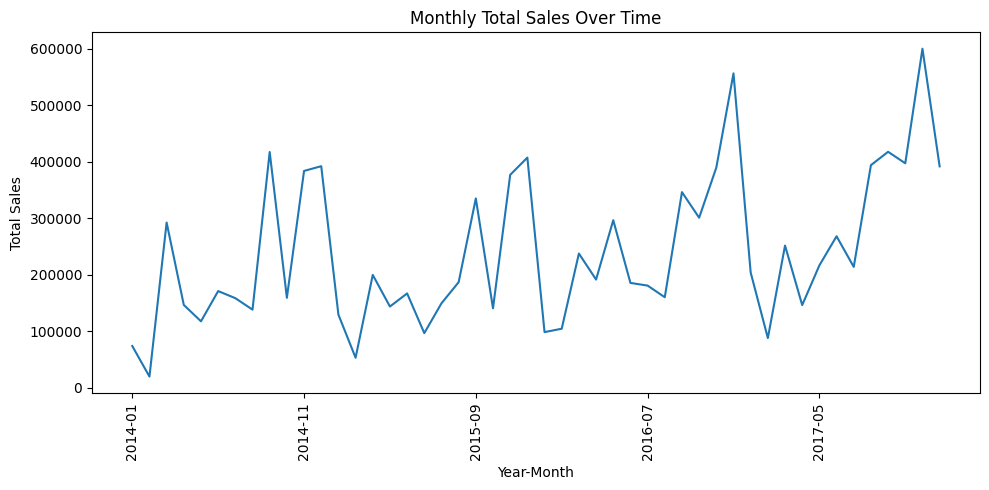

In [345]:
plt.figure(figsize=(10, 5))
monthly_sales = df_ss_v7.groupby(['OrderDate_Year_Month'])['Total Sales'].sum()
monthly_sales.plot()
plt.title("Monthly Total Sales Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

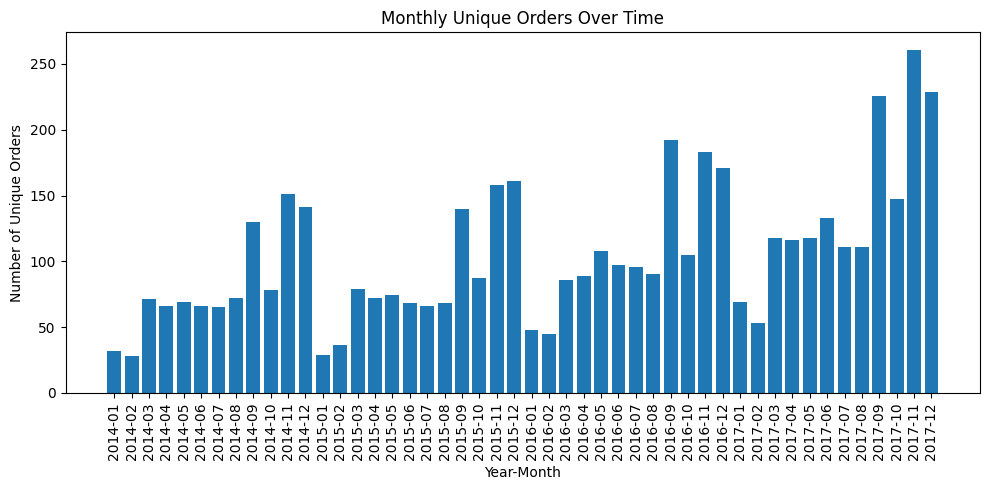

In [346]:
plt.figure(figsize=(10, 5))
monthly_orders = df_ss_v7.groupby(['OrderDate_Year_Month'])['Order ID'].nunique()
plt.bar(monthly_orders.index, monthly_orders.values)
plt.title("Monthly Unique Orders Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Unique Orders")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

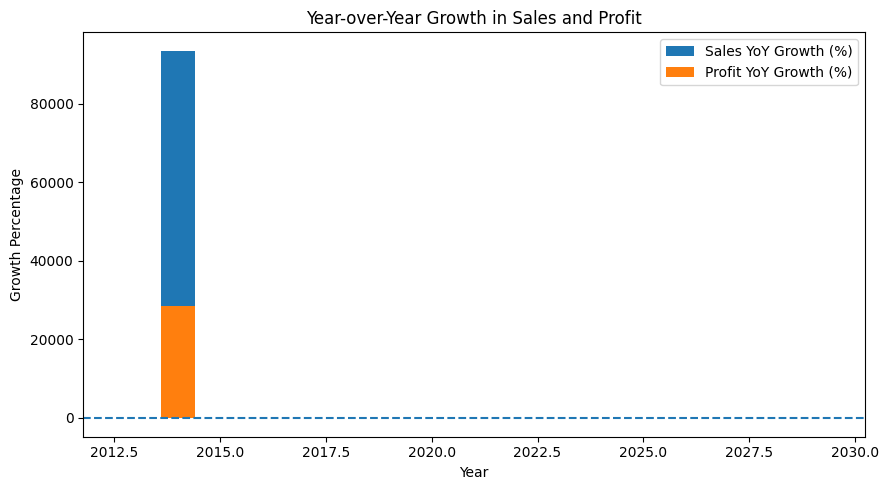

In [347]:
# Calculating Year-over-Year Growth in Sales and Profit
yearly_performance = df_ss_v7.groupby("OrderDate_Year").agg({"Total Sales": "sum", "Total Profit": "sum"}).reset_index().sort_values(
    "OrderDate_Year")

yearly_performance["Sales YoY Growth (%)"] = (yearly_performance["Total Sales"].pct_change() * 100)
yearly_performance["Profit YoY Growth (%)"] = (yearly_performance["Total Profit"].pct_change() * 100)

plt.figure(figsize=(9, 5))

plt.bar(yearly_performance["OrderDate_Year"], yearly_performance["Sales YoY Growth (%)"], label="Sales YoY Growth (%)")
plt.bar(yearly_performance["OrderDate_Year"],yearly_performance["Profit YoY Growth (%)"], label="Profit YoY Growth (%)")
plt.axhline(0, linestyle="--")  # Growth baseline
plt.title("Year-over-Year Growth in Sales and Profit")
plt.xlabel("Year")
plt.ylabel("Growth Percentage")
plt.legend()
plt.tight_layout()
plt.show()

End of file.